### Readme
This notebook demonstrates the process of feature engineering using TF-IDF vectorization and PCA for dimensionality reduction. We will walk through the following steps:

1. **Data Preprocessing:** Clean and preprocess the text data.
2. **TF-IDF Vectorization:** Transform the cleaned text data into TF-IDF vectors.
3. **PCA Transformation:** Apply PCA to reduce the dimensionality of the TF-IDF vectors.
4. **Variance Analysis:** Analyze the explained variance to determine the effectiveness of the PCA transformation.

## Contents
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Load Data](#2.-Load-Data)
- [3. Data Preprocessing](#3.-Data-Preprocessing)
- [4. TF-IDF Vectorization and Feature Count](#4.-TF-IDF-Vectorization-and-Feature-Count)
- [5. Determining the Number of Principal Components for Desired Variance Explained](#5.-Determining-the-Number-of-Principal-Components-for-Desired-Variance-Explained)
- [6. PCA Transformation and Variance Analysis](#6.-PCA-Transformation-and-Variance-Analysis)
- [7. Conclusion](#7.-Conclusion)
- [8. Convert the reduced TF-IDF vectors to a DataFrame](#8.-Convert-the-reduced-TF-IDF-vectors-to-a-DataFrame
)



### Import and Get Data

In [63]:
# 1. Import
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.feature_extraction.text import CountVectorizer

# 2. Get data
df = pd.read_csv('transformed_data_v1.csv')
df.shape


(13843, 9)

### Find out Vocabulary size

In [64]:
text_data = df['clean_lemm_preprocessed_text'].tolist()
vectorizer = CountVectorizer()
vectorizer.fit_transform(text_data)

# Vocabulary size
vocabulary_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 54056


### TF-IDF Vectorization and Feature Count

In [36]:
# 3. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.99, 
    min_df=10
)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['clean_lemm_preprocessed_text'])

# Count the number of features
num_features = len(tfidf_vectorizer.get_feature_names_out())
print(f"Number of features created: {num_features}")

Number of features created: 6168


The dataset contains 13,843 rows, and the TF-IDF vectorization generates 6,969 features. This number of features is excessive. To manage this, we should apply dimensionality reduction and limit the number of features to no more than 10% of the dataset size, which is 1,384 features in total.

### Determining the Number of Principal Components for Desired Variance Explained

In [39]:
# Fit PCA with all components
pca = PCA(n_components=None)
pca.fit(tfidf_vectors.toarray())

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Thresholds for explained variance
thresholds = [0.95, 0.90, 0.85]

# Find the number of components for each threshold
num_components = {threshold: np.argmax(cumulative_explained_variance >= threshold) + 1 for threshold in thresholds}

# Print the number of components for each threshold
for threshold, components in num_components.items():
    print(f"Number of components to explain {threshold * 100}% variance: {components}")


Number of components to explain 95.0% variance: 2692
Number of components to explain 90.0% variance: 1758
Number of components to explain 85.0% variance: 1237


Analyzing the result we can say that 1300 features will explain more than 85% variance

### PCA Transformation and Variance Analysis

Using 1300 components
Working on PCA
Elapsed time: 59.52487015724182 seconds
Number of features after PCA: 1300


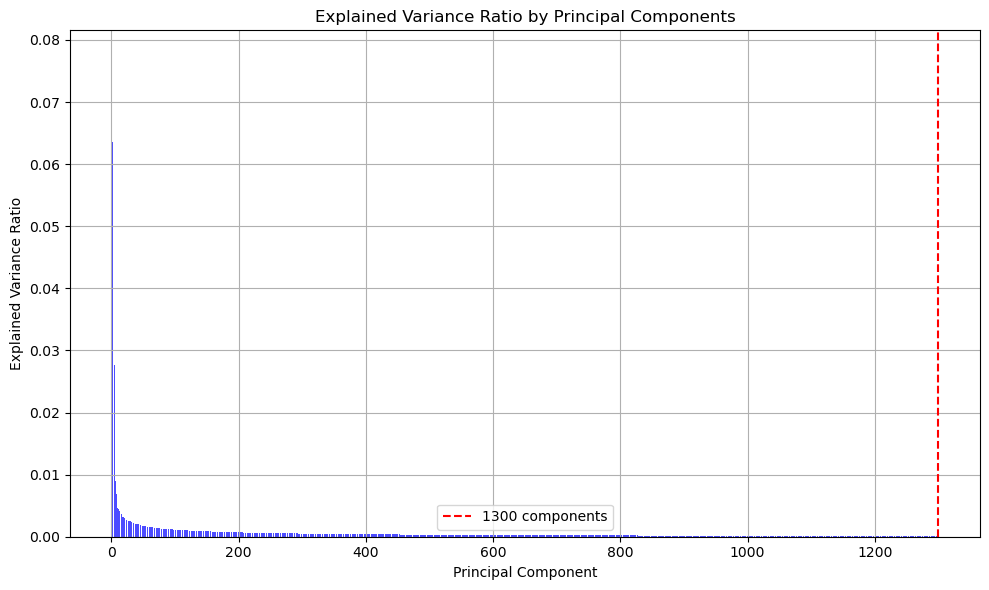

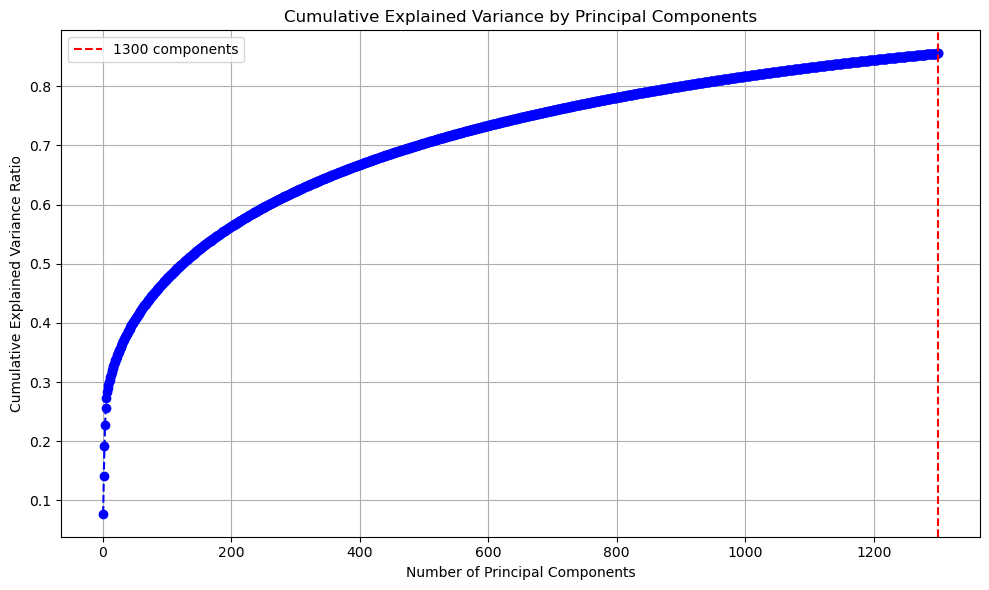

In [42]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA with 1300 components
pca = PCA(n_components=1300)
pca.fit(tfidf_vectors.toarray())

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the number of components
print("Using 1300 components")

# Refit PCA with 1300 components
print("Working on PCA")
start_time = time.time()
tfidf_vectors_reduced = pca.fit_transform(tfidf_vectors.toarray())
end_time = time.time()
print(f"Elapsed time: {end_time - start_time} seconds")

# Count the number of features after PCA
num_features_reduced = tfidf_vectors_reduced.shape[1]
print(f"Number of features after PCA: {num_features_reduced}")

# Plot explained variance ratio as a histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='b', alpha=0.7)
plt.axvline(x=1300, color='r', linestyle='--', label='1300 components')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('explained_variance_ratio_histogram.png')

# Show the plot
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axvline(x=1300, color='r', linestyle='--', label='1300 components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_explained_variance_ratio_plot.png')

# Show the plot
plt.show()


### Conclusion

- **Cumulative Explained Variance Plot**
The cumulative explained variance plot shows that 1300 components are required to capture slightly over 85% of the total variance. The curve rises steeply initially and then starts to flatten out, indicating diminishing returns for each additional component.
- **Explained Variance Ratio Histogram**
The histogram shows that the first few principal components explain a significant portion of the variance, while the contribution of each subsequent component rapidly decreases.
- **Conclusion**
Based on the analysis, 1300 components were selected to capture slightly over 85% of the variance. This decision is based on the best practice of not creating a number of features that exceeds 10% of the 13,000 rows in the dataset. Choosing fewer components would capture significantly less variance and may not be sufficient for effective data representation.

### Convert the reduced TF-IDF vectors to a DataFrame

In [58]:
tfidf_features_df = pd.DataFrame(tfidf_vectors_reduced, columns=[f'tfidf_feature_{i}' for i in range(1, num_features_reduced + 1)])
# Export the reduced TF-IDF features to a CSV file
tfidf_features_df.to_csv('tfidf_features.csv', index=False)

In [51]:
tfidf_features_df.shape

(13843, 1300)

In [52]:
tfidf_features_df.head()

,tfidf_feature_1,tfidf_feature_2,tfidf_feature_3,tfidf_feature_4,tfidf_feature_5,tfidf_feature_6,tfidf_feature_7,tfidf_feature_8,tfidf_feature_9,tfidf_feature_10,...,tfidf_feature_1291,tfidf_feature_1292,tfidf_feature_1293,tfidf_feature_1294,tfidf_feature_1295,tfidf_feature_1296,tfidf_feature_1297,tfidf_feature_1298,tfidf_feature_1299,tfidf_feature_1300
0,0.331321,-0.077857,-0.064500,-0.001558,0.052824,0.280229,0.022109,0.107194,0.029017,-0.019303,...,-0.004289,0.007431,0.001110,-0.002258,0.011540,-0.008373,0.006289,0.013334,0.000038,0.000133
1,-0.140041,0.517077,-0.313163,-0.008119,-0.059360,-0.012282,0.010914,-0.059789,-0.023899,0.021718,...,-0.008835,0.002224,0.002022,0.000414,0.010228,0.009403,-0.007895,-0.013383,0.007536,-0.005526
2,-0.024343,0.045637,0.101419,-0.013046,0.381461,-0.071019,-0.002670,0.105201,0.009247,-0.086095,...,-0.003679,-0.017661,0.001748,-0.018904,0.001836,0.024326,0.004612,0.006400,0.021751,-0.003603
3,0.397266,-0.119471,-0.114529,-0.000858,-0.043984,-0.020040,0.016063,-0.006226,0.075869,0.054712,...,-0.000136,0.010159,-0.014822,0.009271,-0.016358,-0.002428,-0.006468,0.000852,0.003331,0.002286
4,-0.031322,0.061860,0.240530,-0.220231,-0.043158,-0.002319,0.033518,0.125073,0.029756,-0.033702,...,-0.008874,-0.003359,0.009186,-0.023060,-0.005461,-0.008493,0.009210,0.002091,0.003931,0.010133
